# **A Gender and Economic-centric Approach on Life Satisfaction**

According to the World Health Organization (2021), Suicide is a major global health issue, with more than 700,000 people dying by suicide each year. It affects people of all ages, but is particularly prevalent among 15-29 year olds, who account for a significant proportion of global suicides. While suicides occur in all regions of the world, a majority (over 77%) happen in low- and middle-income countries. Despite being a major public health problem, suicides are preventable with the implementation of evidence-based interventions that can be both timely and cost-effective.

Life satisfaction is an individual's assessment of the overall quality of their life based on their own personal criteria (Shin and Johnson, 1978). It is a cognitive aspect of subjective well-being and is significant because it reflects both an individual's circumstances and their mental state (Pavot and Diener, 1993).

**The questions we seek to answer in this Exploratory Data Analysis are:**
1. Which gender is most likely to live longer?
2. Which countries are the happiest? the least happiest?
3. Which countries are the most fertile?
4. Is there a correlation between fertility rate and life expectancy of each gender?
5. Is there a relationship between GDP and the life expectancy of men and women?
6. Is there a connection between GDP and the rate of suicide?
7. Does low happiness score indicate higher suicide rates?

# **Setup**

Next cell imports all Python libraries needed for the project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# **Import all datasets**

Each import will be showing its first 5 rows of data as a preview.

In [2]:
suicide_data = pd.read_csv("../data/Suicide Rate.csv")
suicide_data.head()

,Country,GDP per capita,Suicide Rate
0,Afghanistan,"1,105",20.6
1,Albania,"4,932",32.4
2,Algeria,"4,534",15.6
3,Andorra,"46,622",18.9
4,Angola,"2,077",20.5


In [3]:
life_expectancy_data = pd.read_csv("../data/Life Expectancy.csv")
life_expectancy_data.head()

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
0,Afghanistan,60.6,68.2,3.794,4.7
1,Albania,74.8,81.3,4.959,1.7
2,Algeria,73.3,78.9,5.605,2.9
3,Andorra,81.7,84.8,6.955,1.4
4,Angola,58.1,65.6,4.105,5.3


# **Data Preprocessing**

Check if there are any missing values in the datasets.

In [4]:
# Checking if there are any NaN values in the suicide rate dataset

suicide_nan_count = suicide_data.isna().sum().sum()
suicide_nan_count

0

In [5]:
# Checking if there are any NaN values in the life expectancy dataset

life_expectancy_nan_count = life_expectancy_data.isna().sum().sum()
life_expectancy_nan_count

0

Both datasets do not have `NaN` values. Scaling and normalization is not necessary since all data have been measured on the same range.

# **Plots and Analysis**

### 1. Which gender is most likely to live longer?


In [6]:
# Reshape initial dataframe in order to have a grouped barplot

life_exp_copy = life_expectancy_data.copy()
life_exp_copy.pop("Happiness Score")
life_exp_copy.pop("Fertility Rate (births per woman)")
life_exp_copy.rename(columns = {'Life Expectancy (years) - Men':'Men', 'Life Expectancy (years) - Women':'Women'}, inplace = True)
life_exp_melted_df = pd.melt(life_exp_copy, id_vars="Country", var_name="Gender", value_name="Life Expectancy")
life_exp_melted_df

,Country,Gender,Life Expectancy
0,Afghanistan,Men,60.6
1,Albania,Men,74.8
2,Algeria,Men,73.3
3,Andorra,Men,81.7
4,Angola,Men,58.1
...,...,...,...
279,Qatar,Women,82.5
280,Singapore,Women,85.9
281,United Arab Emirates,Women,80.6
282,United States,Women,81.1


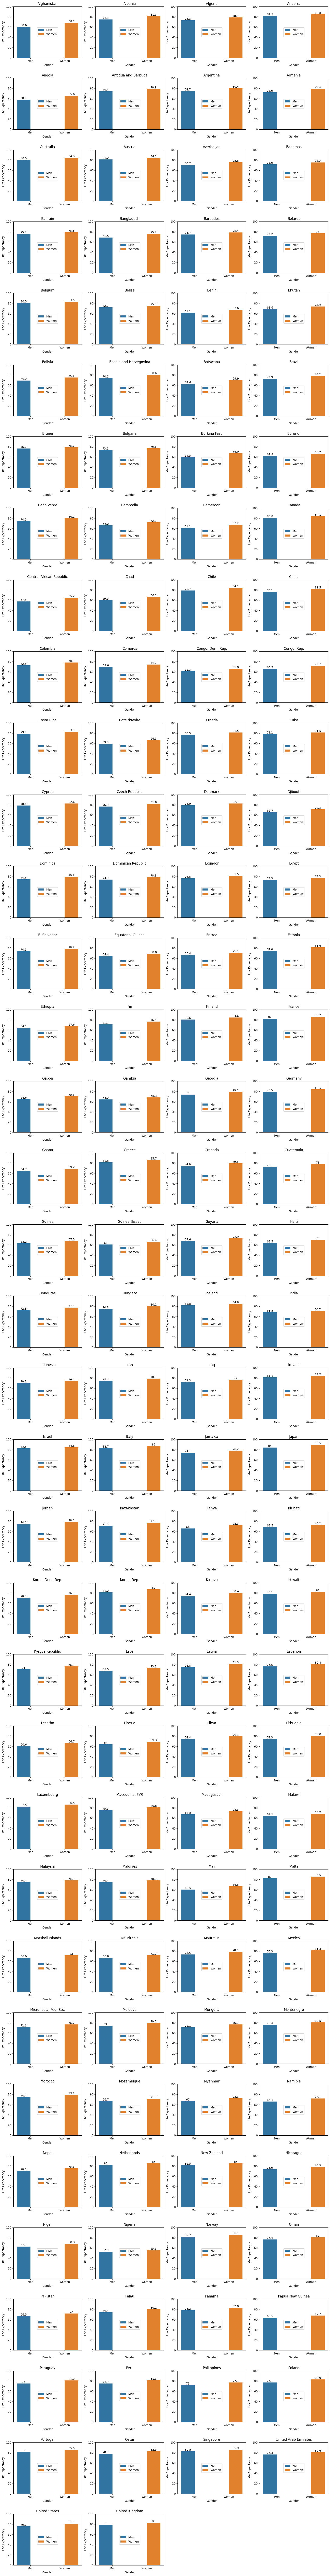

In [7]:
# Generate subplots of barplots

countries = list(life_exp_melted_df['Country'].unique())
plt.figure(figsize=(20, 650))
for i, country in enumerate(countries):
    temp_df = life_exp_melted_df[life_exp_melted_df['Country'] == country]
    plt.subplot(len(countries), 4, i + 1)
    ax = sns.barplot(data=temp_df, x="Gender", y="Life Expectancy", hue="Gender")
    ax.set(title=f"{country}")
    ax.set(ylim=(0, 100))
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.legend(loc='center')
plt.subplots_adjust(hspace=0.4)

In [8]:
# Calculate average life expectancy for males and females

men_ages = list(life_exp_melted_df.loc[life_exp_melted_df['Gender'] == "Men", 'Life Expectancy'])
women_ages = list(life_exp_melted_df.loc[life_exp_melted_df['Gender'] == "Women", 'Life Expectancy'])
men_average = sum(men_ages) / len(men_ages)
men_average

72.23380281690144

In [9]:
women_average = sum(women_ages) / len(women_ages)
women_average

77.14647887323943

In [10]:
gender_expectancy_difference = women_average - men_average
gender_expectancy_difference

4.912676056337986

On average, men are expected to live to 72.23380281690144 years old while women are expected to live up to 77.14647887323943 years old. Women live longer than men by 4.912676056337986 years.

In [11]:
# Find countries with lowest life expectancy per gender

men_df = life_exp_melted_df[life_exp_melted_df['Gender'] == "Men"]
women_df = life_exp_melted_df[life_exp_melted_df['Gender'] == "Women"]
lowest_men = lowest_women = [None, None]

for index, row in men_df.iterrows():
    if not lowest_men[1] or lowest_men[1] > row["Life Expectancy"]:
        lowest_men = [row["Country"], row["Life Expectancy"]]

for index, row in women_df.iterrows():
    if not lowest_women[1] or lowest_women[1] > row["Life Expectancy"]:
        lowest_women = [row["Country"], row["Life Expectancy"]]

print(lowest_men, lowest_women)

['Nigeria', 52.9] ['Nigeria', 55.6]


Nigeria currently hold both of the lowest life expectancies for both genders at 52.9 years old for men, and 55.6 years old for women.

In [12]:
# Find countries with highest life expectancy per gender

highest_men = highest_women = [None, None]

for index, row in men_df.iterrows():
    if not highest_men[1] or highest_men[1] < row["Life Expectancy"]:
        highest_men = [row["Country"], row["Life Expectancy"]]

for index, row in women_df.iterrows():
    if not highest_women[1] or highest_women[1] < row["Life Expectancy"]:
        highest_women = [row["Country"], row["Life Expectancy"]]

print(highest_men, highest_women)

['Japan', 84.0] ['Japan', 89.5]


Japan currently hold both of the highest life expectancies for both genders at 84.0 years old for men, and 89.5 years old for women.

### 2. Which countries are the happiest? the least happiest?

The Happiness Index is a thorough survey tool that evaluates aspects of resilience, sustainability, and happiness. The Happiness Index was created by the Happiness Alliance as a survey tool for community organizers, researchers, and other people interested in using a subjective well-being index and data. The scale ranges from 0 - 10 with 0 being the least happy and 10 being the happiest.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141]),
 [Text(0, 0, 'Finland'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'Denmark'),
  Text(3, 0, 'Iceland'),
  Text(4, 0, 'Norway'),
  Text(5, 0, 'Israel'),
  Text(6, 0, 'Netherlands'),
  Text(7, 0, 'Austria'),

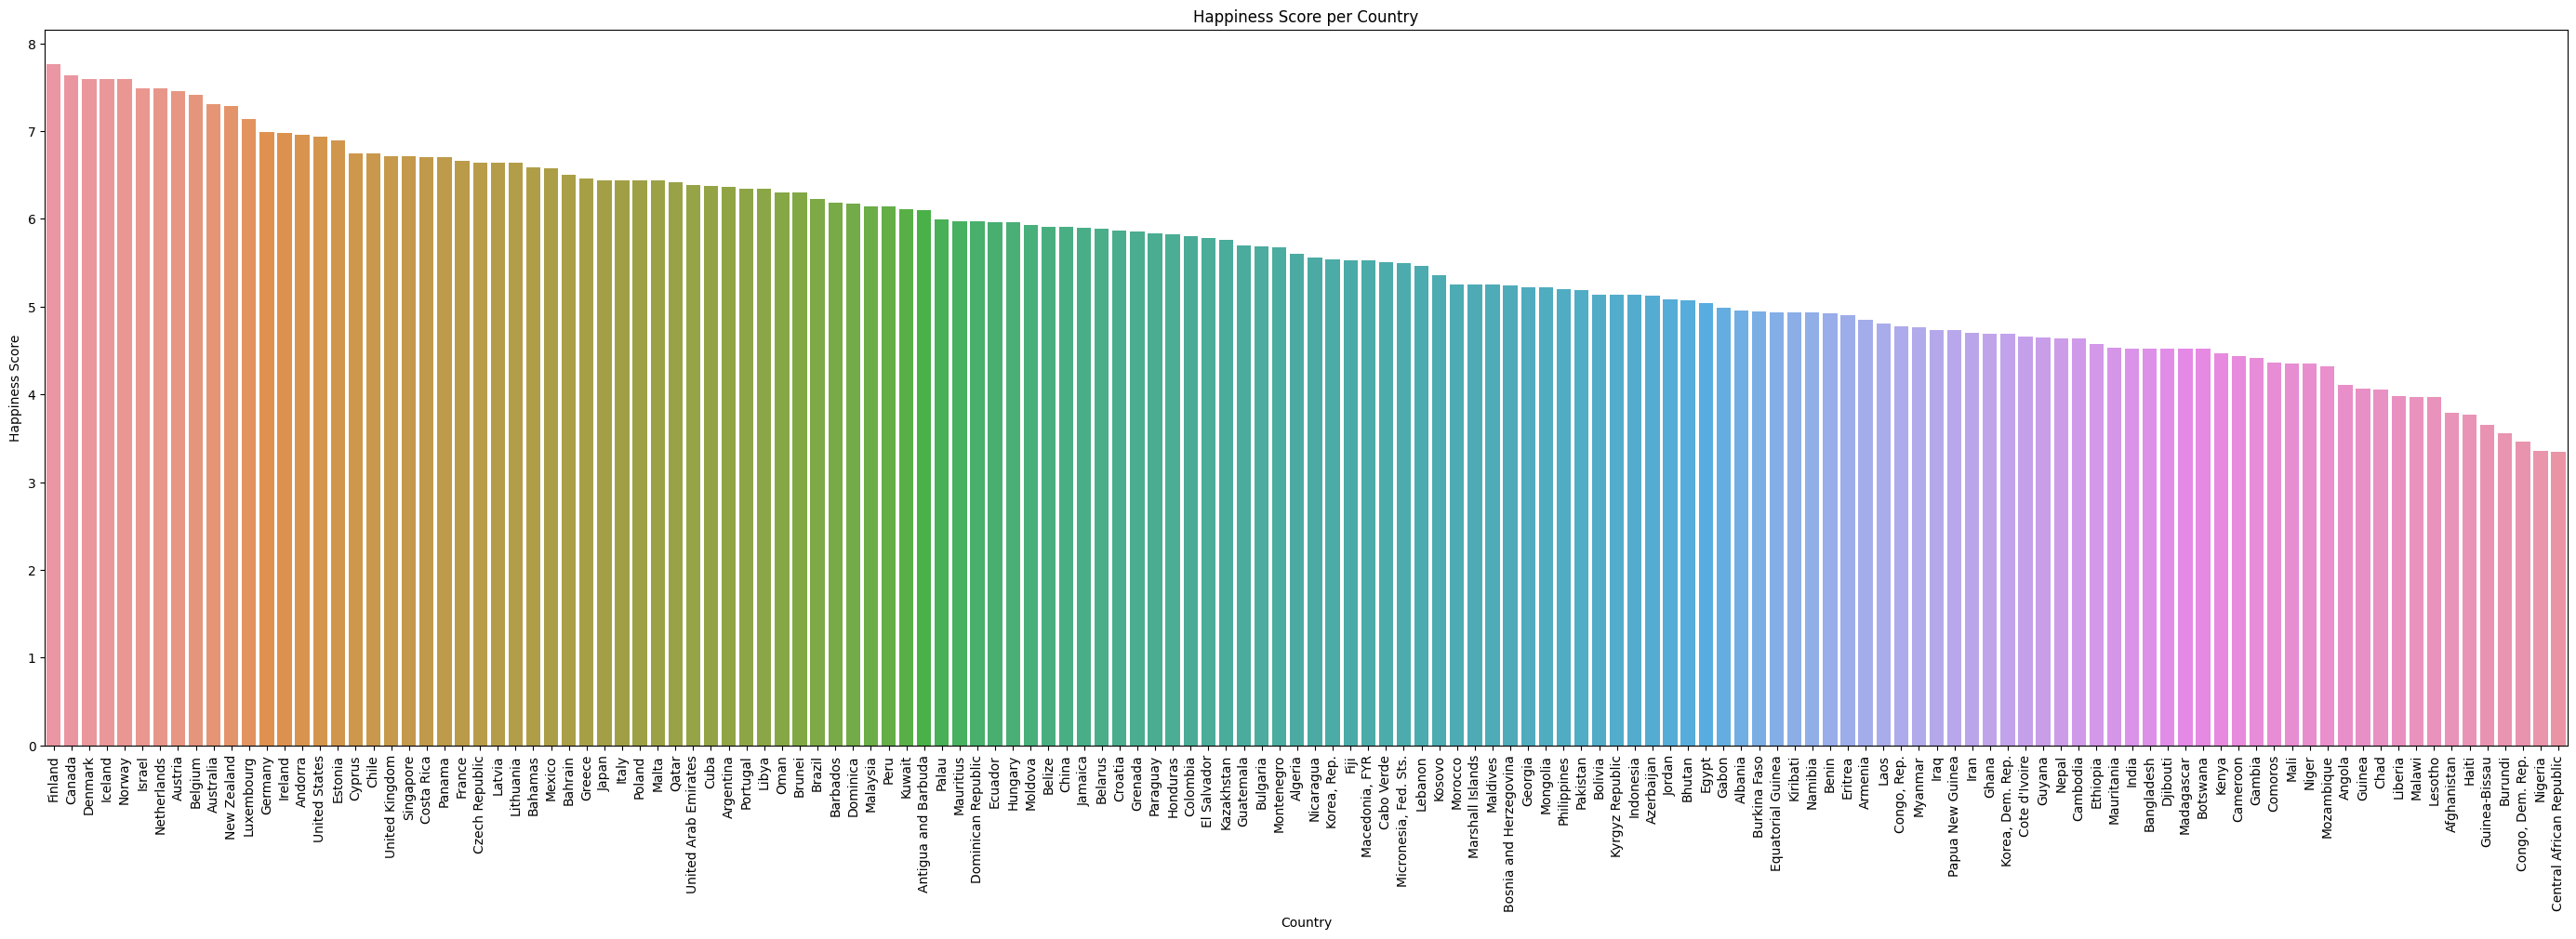

In [13]:
# Generate bar plot for all countries' happiness score

plt.figure(figsize=(35,10))
plt.title("Happiness Score per Country")
sorted_le_data = life_expectancy_data.sort_values("Happiness Score", ascending=False).reset_index(drop=True)
sns.barplot(data=sorted_le_data, x="Country", y="Happiness Score")
plt.xlabel("Country")
plt.xticks(rotation=90)

In [14]:
sorted_le_data[["Country", "Happiness Score"]].head()

,Country,Happiness Score
0,Finland,7.769
1,Canada,7.632
2,Denmark,7.596
3,Iceland,7.594
4,Norway,7.594


In [15]:
sorted_le_data[["Country", "Happiness Score"]].tail()

,Country,Happiness Score
137,Guinea-Bissau,3.652
138,Burundi,3.557
139,"Congo, Dem. Rep.",3.462
140,Nigeria,3.357
141,Central African Republic,3.351


The top 5 happiest countries are Finland at 7.769, Canada at 7.632, Denmark at 7.596, and Norway and Iceland at 7.594. The bottom 5 are Guinea-Bissau at 3.652, Burundy at 3.557, Congo, Dem. Rep. at 3.462, Nigeria at 3.357, Central African Republic at 3.351.

### 3. Which countries are the most fertile?

Fertility rate here represents the average number of births per woman in the country.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141]),
 [Text(0, 0, 'Niger'),
  Text(1, 0, 'Mali'),
  Text(2, 0, 'Burundi'),
  Text(3, 0, 'Nigeria'),
  Text(4, 0, 'Guinea-Bissau'),
  Text(5, 0, 'Guinea'),
  Text(6, 0, 'Burkina Faso'),
  Text(7, 0, 'Congo,

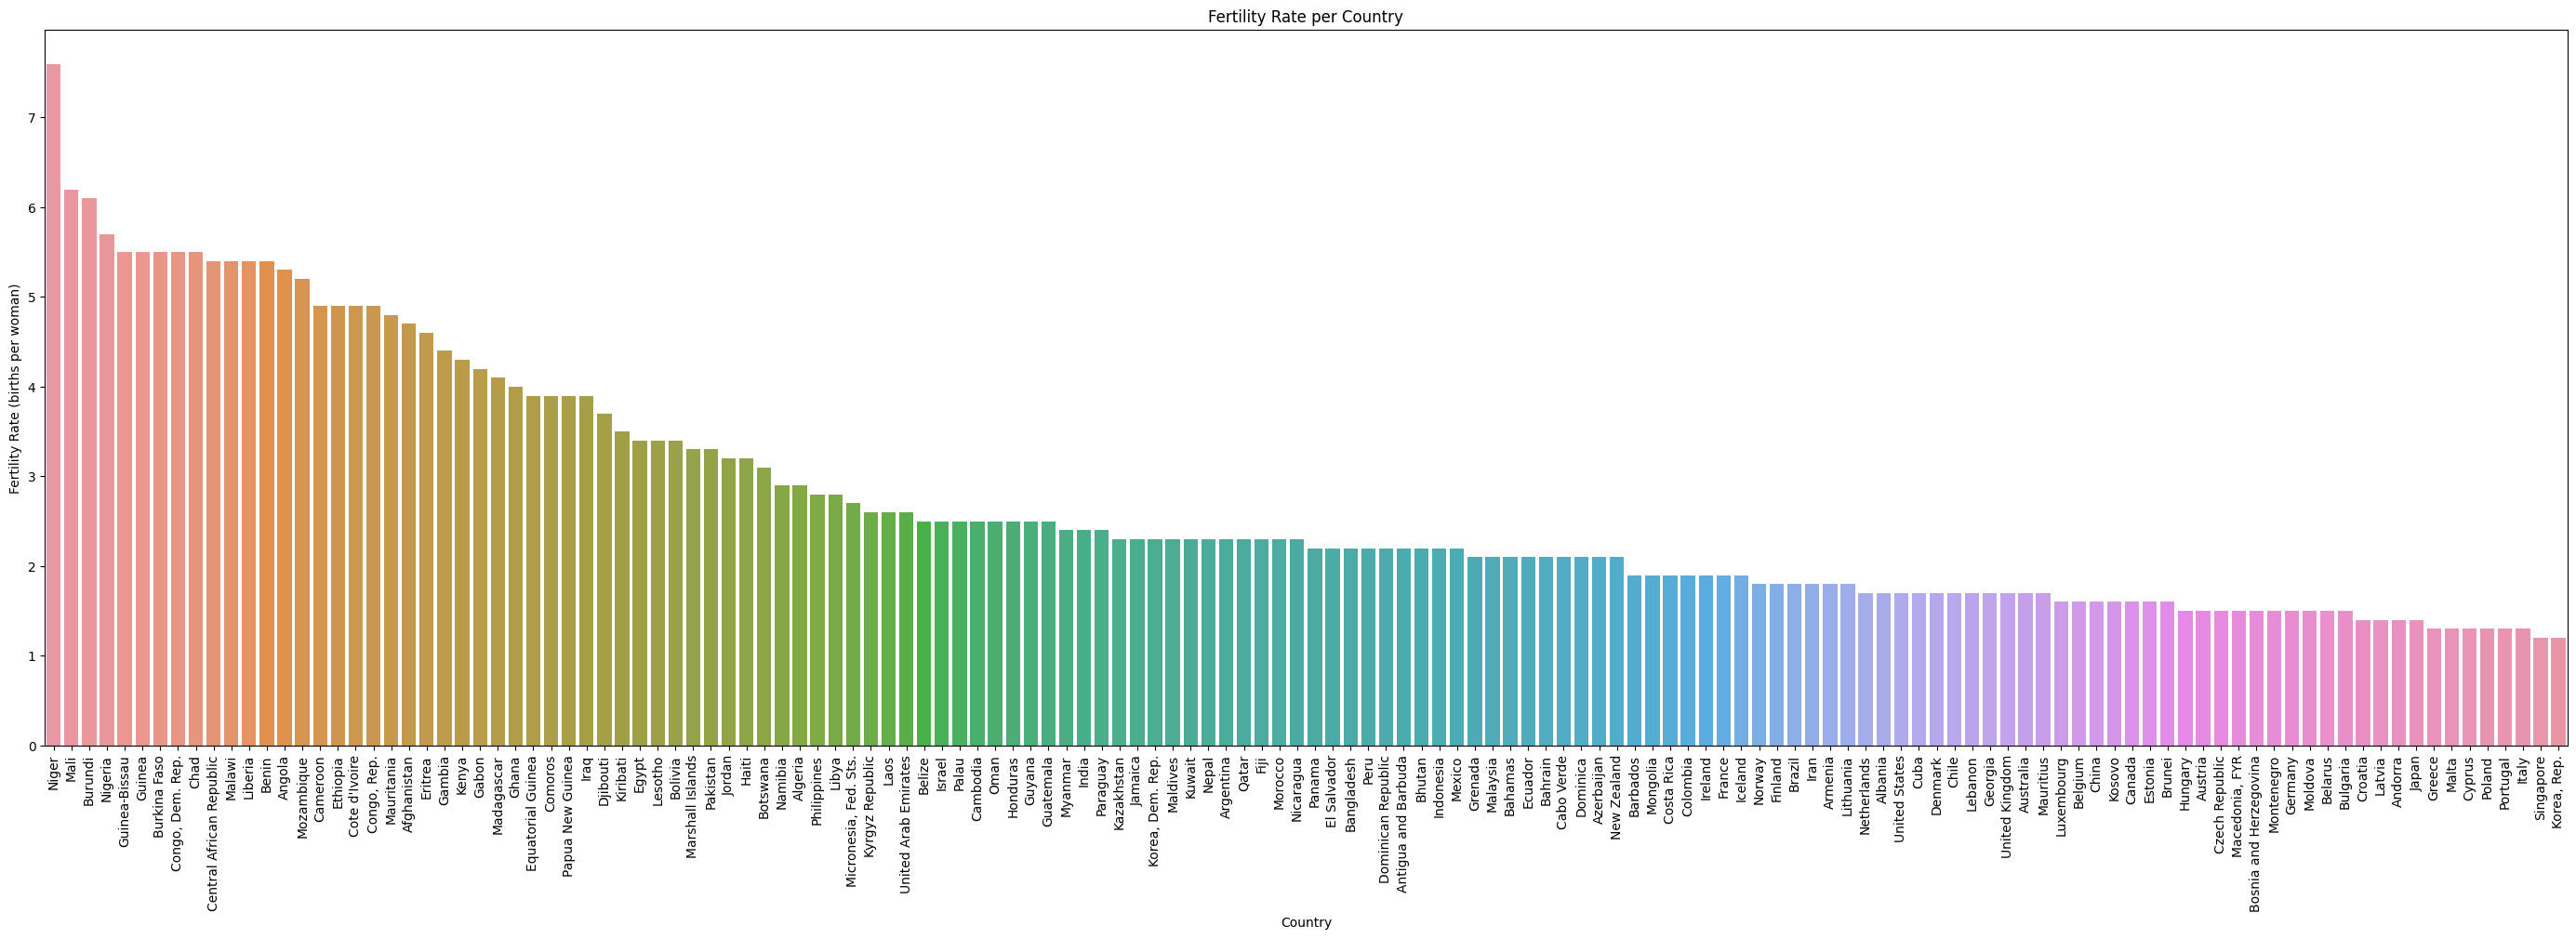

In [16]:
# Generate bar plot for all countries' fertility rate

plt.figure(figsize=(35,10))
plt.title("Fertility Rate per Country")
sorted_le_data = life_expectancy_data.sort_values("Fertility Rate (births per woman)", ascending=False).reset_index(drop=True)
sns.barplot(data=sorted_le_data, x="Country", y="Fertility Rate (births per woman)")
plt.xlabel("Country")
plt.xticks(rotation=90)

In [17]:
sorted_le_data[["Country", "Fertility Rate (births per woman)"]].head()

,Country,Fertility Rate (births per woman)
0,Niger,7.6
1,Mali,6.2
2,Burundi,6.1
3,Nigeria,5.7
4,Guinea-Bissau,5.5


In [18]:
sorted_le_data[["Country", "Fertility Rate (births per woman)"]].tail()

,Country,Fertility Rate (births per woman)
137,Poland,1.3
138,Portugal,1.3
139,Italy,1.3
140,Singapore,1.2
141,"Korea, Rep.",1.2


The countries with the most births are all African countries with Niger at 7.6 births, Mali at 6.2 births, Burundi at 6.1 births, Nigeria at 5.7 births, and Guinea-Bissau at 5.5 births. As for the countries with the least births, it is a mix of European and Asian countries. Poland, Portugal, and Italy share the first 3 spots at 1.3 births, while Singapore and South Korea (Republic of Korea) share the last 2 spots at 1.2 births.

### 4. Is there a correlation between fertility rate and life expectancy of each gender?

Correlation will be calculated using the Pearson correlation coefficient which is a test statistic that assesses the statistical association, or relationship, between two continuous variables. Because it is based on the method of covariance, it is regarded as the best method for determining the association between variables of interest. It provides details on the size of the association or correlation as well as the relationship's slant.

<AxesSubplot: title={'center': "Correlation of Women's Life Expectancy and Fertility Rate \n(r = -0.86)"}, xlabel='Life Expectancy (years) - Women', ylabel='Fertility Rate (births per woman)'>

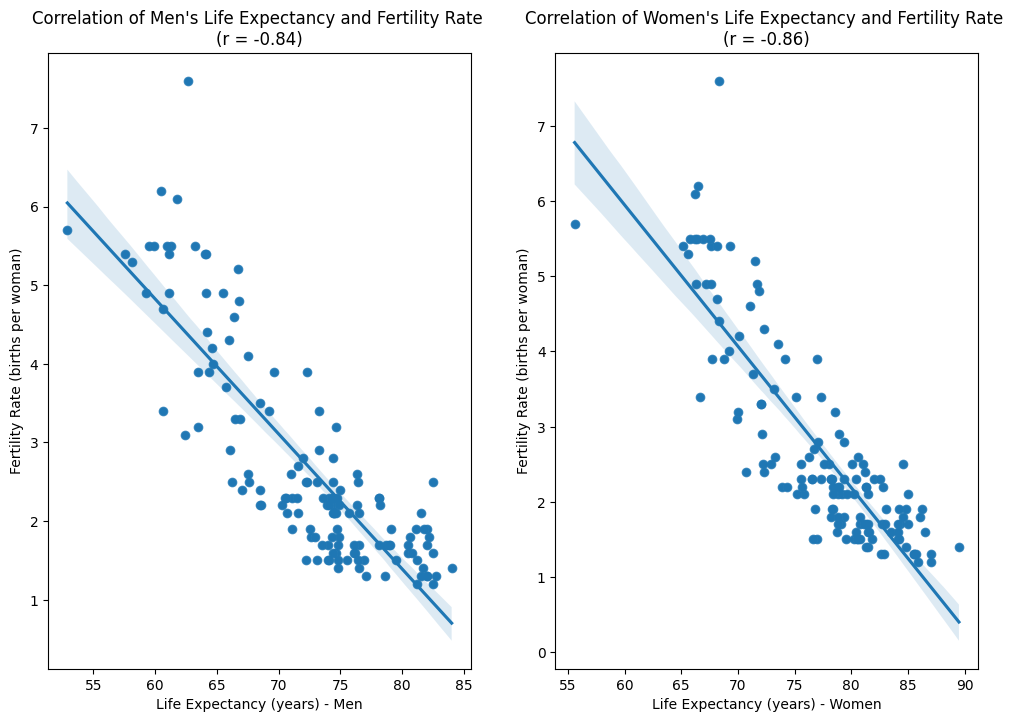

In [19]:
# Generate scatterplots for each gender and Pearson correlation coefficient

men_le_list = np.array(life_expectancy_data["Life Expectancy (years) - Men"].values.tolist())
women_le_list = np.array(life_expectancy_data["Life Expectancy (years) - Women"].values.tolist())
fertility_rate_list = np.array(life_expectancy_data["Fertility Rate (births per woman)"].values.tolist())

fig, ax = plt.subplots(1, 2, figsize=(12,8))
plt.subplot(1, 2, 1)
men_rho = np.corrcoef(men_le_list, fertility_rate_list)
plt.title("Correlation of Men's Life Expectancy and Fertility Rate \n(r = {:.2f})".format(men_rho[0,1]))
sns.scatterplot(data=life_expectancy_data, x="Life Expectancy (years) - Men", y="Fertility Rate (births per woman)")
sns.regplot(data=life_expectancy_data, x="Life Expectancy (years) - Men", y="Fertility Rate (births per woman)")

plt.subplot(1, 2, 2)
women_rho = np.corrcoef(women_le_list, fertility_rate_list)
plt.title("Correlation of Women's Life Expectancy and Fertility Rate \n(r = {:.2f})".format(women_rho[0,1]))
sns.scatterplot(data=life_expectancy_data, x="Life Expectancy (years) - Women", y="Fertility Rate (births per woman)")
sns.regplot(data=life_expectancy_data, x="Life Expectancy (years) - Women", y="Fertility Rate (births per woman)")

Based on the criteria of Pearson's correlation coefficient, both gender's life expectancies exhibit a strong, negative linear relationship with fertility rate. It can be concluded that fertility rates go down as life expectancies of either gender go down as longer lives give more opportunities in terms of career and education. This gives people more options and opportunities, which can lead to changes in fertility rates and family planning decisions.

### 5. Is there a relationship between GDP and the life expectancy of men and women?



In [20]:
# Merge both dataframes into one dataframe

merged_df = pd.merge(suicide_data, life_expectancy_data, how="right", on="Country")
merged_df.head()

,Country,GDP per capita,Suicide Rate,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
0,Afghanistan,"1,105",20.6,60.6,68.2,3.794,4.7
1,Albania,"4,932",32.4,74.8,81.3,4.959,1.7
2,Algeria,"4,534",15.6,73.3,78.9,5.605,2.9
3,Andorra,"46,622",18.9,81.7,84.8,6.955,1.4
4,Angola,"2,077",20.5,58.1,65.6,4.105,5.3


In [21]:
# Check if there are any NaN values

merged_df.isna().sum().sum()

20

In [22]:
merged_df[merged_df.isna().any(axis=1)]

,Country,GDP per capita,Suicide Rate,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
24,Brunei,NaN,NaN,76.2,78.7,6.298,1.6
28,Cabo Verde,NaN,NaN,74.5,80.2,5.507,2.1
88,"Korea, Dem. Rep.",NaN,NaN,70.5,76.5,4.687,2.3
89,"Korea, Rep.",NaN,NaN,81.2,87.0,5.538,1.2
90,Kosovo,NaN,NaN,74.4,80.4,5.362,1.6
92,Kyrgyz Republic,NaN,NaN,71.0,76.3,5.136,2.6
101,"Macedonia, FYR",NaN,NaN,75.5,80.8,5.526,1.5
137,Qatar,NaN,NaN,78.1,82.5,6.420,2.3
138,Singapore,NaN,NaN,82.5,85.9,6.710,1.2
139,United Arab Emirates,NaN,NaN,76.3,80.6,6.390,2.6


There are currently 20 points with `NaN` values located in 10 rows. To handle the missing values, GDP per capita and suicide rates will be filled in with the means of each column.

In [23]:
# Check data types for each column

merged_df.dtypes

Country                               object
GDP per capita                        object
Suicide Rate                         float64
Life Expectancy (years) - Men        float64
Life Expectancy (years) - Women      float64
Happiness Score                      float64
Fertility Rate (births per woman)    float64
dtype: object

GDP per capita is found to be of type `object` which should be in `float64` since it is a numerical value. This also needs to be cleaned up.


In [24]:
# Convert GDP per capita from string to float

merged_df["GDP per capita"] = merged_df["GDP per capita"].str.replace(',', '').astype(float)
merged_df.dtypes

Country                               object
GDP per capita                       float64
Suicide Rate                         float64
Life Expectancy (years) - Men        float64
Life Expectancy (years) - Women      float64
Happiness Score                      float64
Fertility Rate (births per woman)    float64
dtype: object

In [25]:
# Fill in missing values with means and round values to uniform decimal places

merged_df['GDP per capita'].fillna(value=merged_df['GDP per capita'].mean(), inplace=True)
merged_df['Suicide Rate'].fillna(value=merged_df['Suicide Rate'].mean(), inplace=True)
merged_df["Suicide Rate"]= merged_df["Suicide Rate"].round(1)
merged_df["GDP per capita"] = merged_df["GDP per capita"].round(0)
merged_df

,Country,GDP per capita,Suicide Rate,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
0,Afghanistan,1105.0,20.6,60.6,68.2,3.794,4.7
1,Albania,4932.0,32.4,74.8,81.3,4.959,1.7
2,Algeria,4534.0,15.6,73.3,78.9,5.605,2.9
3,Andorra,46622.0,18.9,81.7,84.8,6.955,1.4
4,Angola,2077.0,20.5,58.1,65.6,4.105,5.3
...,...,...,...,...,...,...,...
137,Qatar,15267.0,15.8,78.1,82.5,6.420,2.3
138,Singapore,15267.0,15.8,82.5,85.9,6.710,1.2
139,United Arab Emirates,15267.0,15.8,76.3,80.6,6.390,2.6
140,United States,65112.0,14.0,76.1,81.1,6.940,1.7


In [26]:
# Check again if there are any NaN values

merged_df.isna().sum().sum()

0

In [27]:
merged_df[merged_df.isna().any(axis=1)]

,Country,GDP per capita,Suicide Rate,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)


There are no longer `NaN` values found in the merged dataframe. We can now proceed to analysis.

<AxesSubplot: title={'center': "Correlation of Women's Life Expectancy and GDP \n(r = 0.62)"}, xlabel='Life Expectancy (years) - Women', ylabel='GDP per capita'>

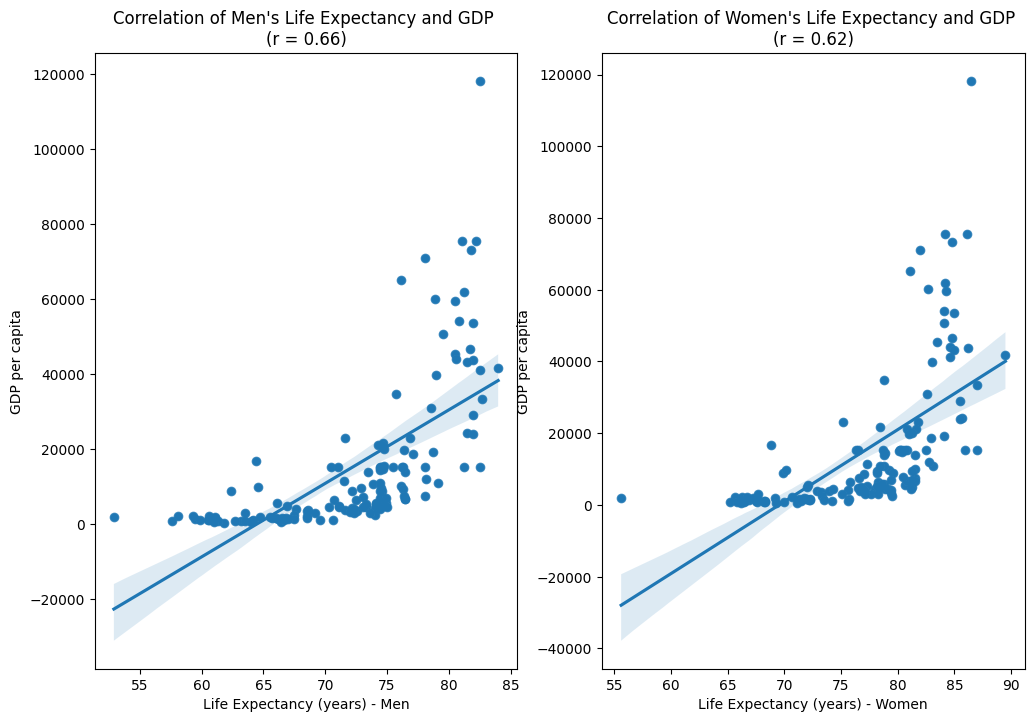

In [28]:
# Generate scatterplots for each gender and Pearson correlation coefficient

gdp_list = np.array(merged_df["GDP per capita"].values.tolist())

fig, ax = plt.subplots(1, 2, figsize=(12,8))
plt.subplot(1, 2, 1)
men_gdp_rho = np.corrcoef(men_le_list, gdp_list)
plt.title("Correlation of Men's Life Expectancy and GDP \n(r = {:.2f})".format(men_gdp_rho[0,1]))
sns.scatterplot(data=merged_df, x="Life Expectancy (years) - Men", y="GDP per capita")
sns.regplot(data=merged_df, x="Life Expectancy (years) - Men", y="GDP per capita")

plt.subplot(1, 2, 2)
women_gdp_rho = np.corrcoef(women_le_list, gdp_list)
plt.title("Correlation of Women's Life Expectancy and GDP \n(r = {:.2f})".format(women_gdp_rho[0,1]))
sns.scatterplot(data=merged_df, x="Life Expectancy (years) - Women", y="GDP per capita")
sns.regplot(data=merged_df, x="Life Expectancy (years) - Women", y="GDP per capita")

Based on the criteria of Pearson's correlation coefficient, both gender's life expectancies exhibit a moderate, positive linear relationship with GDP per capita. It shows that countries that are relatively well off compared to others have higher life expectancies. This could be attributed to better access to basic necessities, government services such as health care, and benefits.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141]),
 [Text(0, 0, 'Luxembourg'),
  Text(1, 0, 'Ireland'),
  Text(2, 0, 'Norway'),
  Text(3, 0, 'Iceland'),
  Text(4, 0, 'Kuwait'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Austria'),
  Text(7, 0, 'Denm

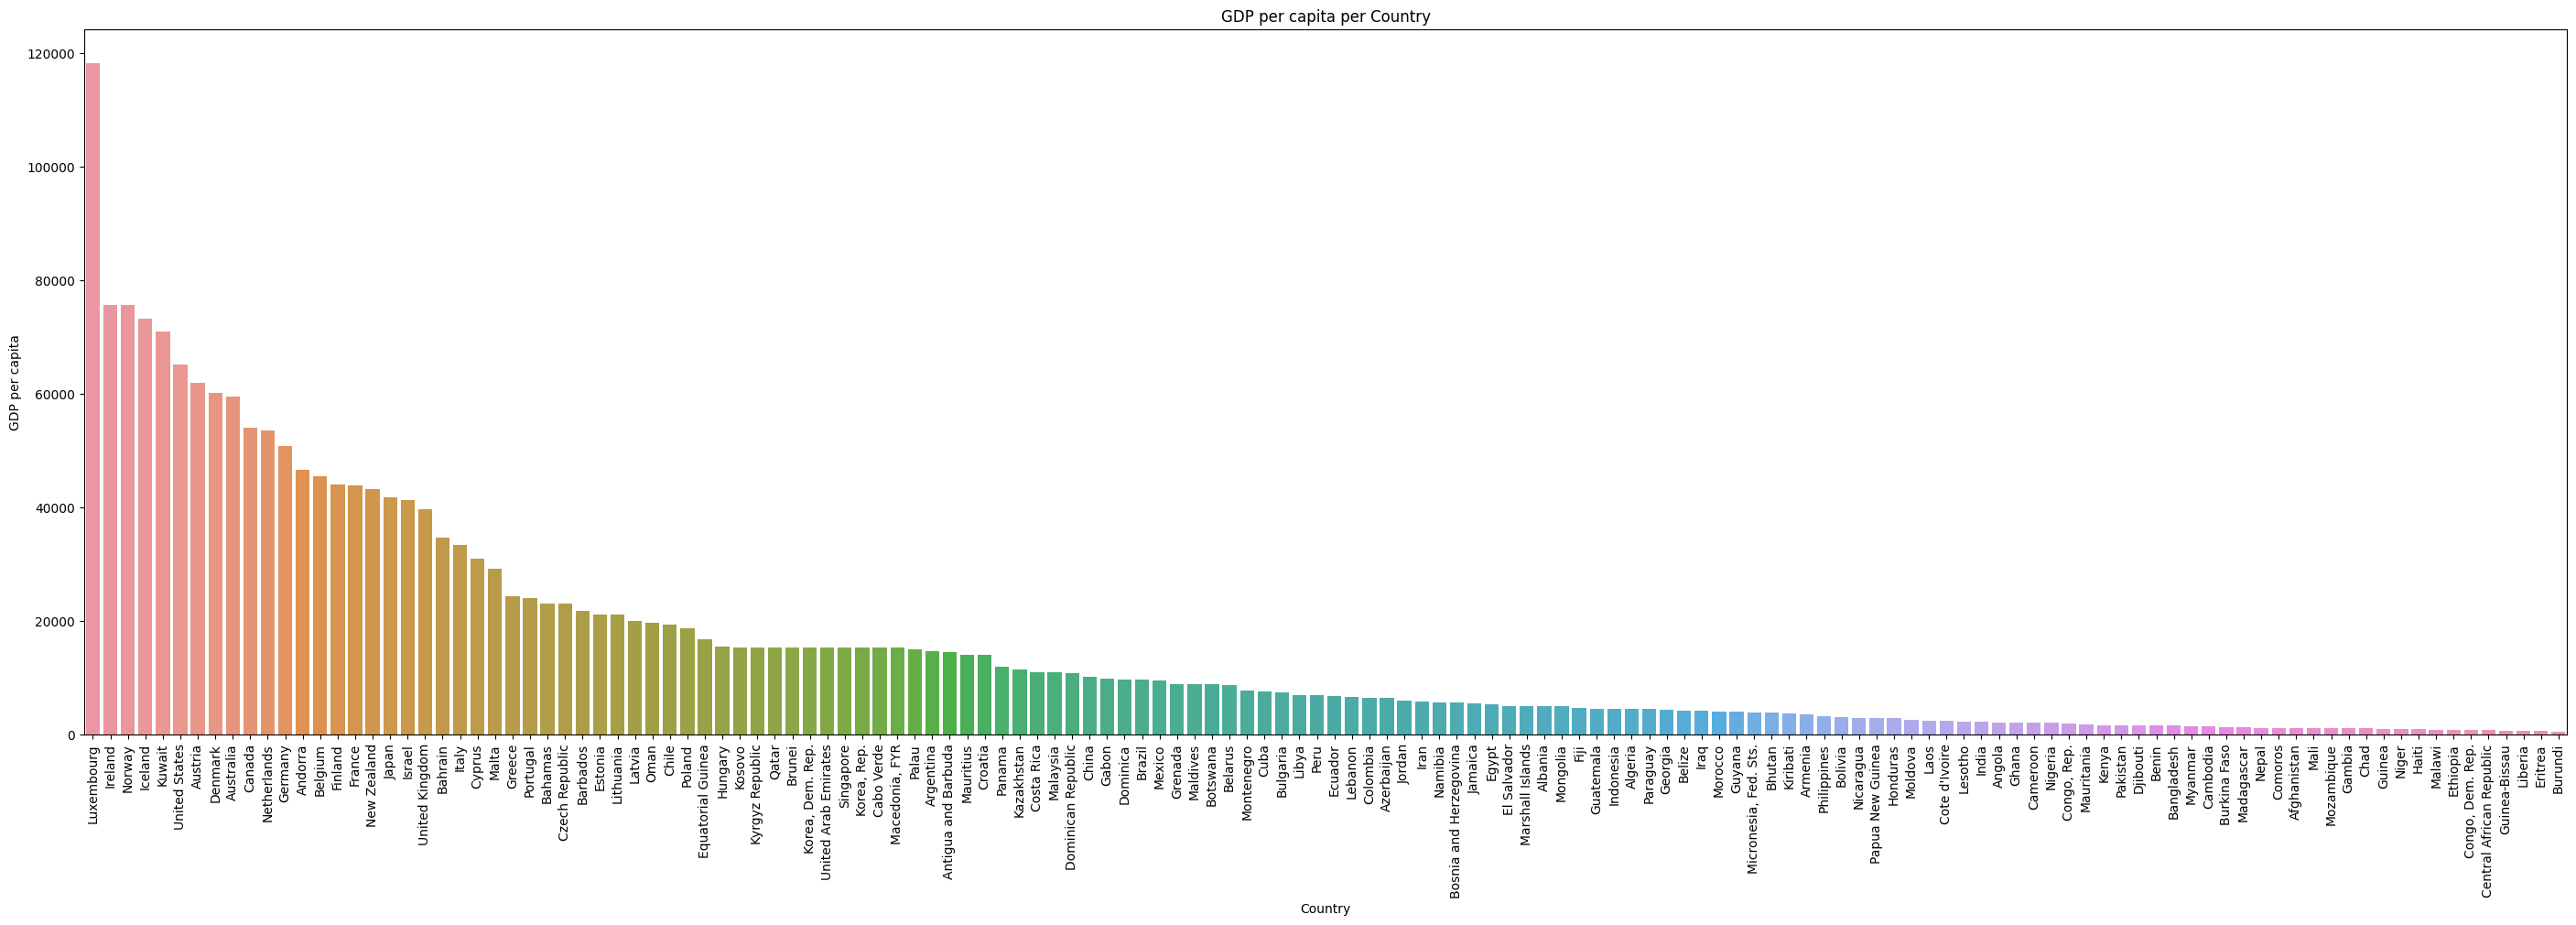

In [29]:
# Generate bar plot for all countries' GDP

plt.figure(figsize=(35,10))
plt.title("GDP per capita per Country")
sorted_gdp_data = merged_df.sort_values("GDP per capita", ascending=False).reset_index(drop=True)
sns.barplot(data=sorted_gdp_data, x="Country", y="GDP per capita")
plt.xlabel("Country")
plt.xticks(rotation=90)

In [30]:
sorted_gdp_data[["Country", "GDP per capita"]].head()

,Country,GDP per capita
0,Luxembourg,118287.0
1,Ireland,75638.0
2,Norway,75588.0
3,Iceland,73181.0
4,Kuwait,70976.0


In [31]:
sorted_gdp_data[["Country", "GDP per capita"]].tail()

,Country,GDP per capita
137,Central African Republic,751.0
138,Guinea-Bissau,675.0
139,Liberia,647.0
140,Eritrea,556.0
141,Burundi,463.0


The countries with the highest GDP per capita are Luxembourg at 118,287, Ireland at 75,638, Norway at 75,588, Iceland at 73,181, and Kuwait at 70,976. The ones with the lowest GDP are Central African Republic at 751, Guinea-Bissau at 675, Liberia at 647, Eritrea at 556, and Burundi at 463.

### 6. Is there a connection between GDP and the rate of suicide?

<AxesSubplot: title={'center': 'Correlation of GDP and Suicide Rates \n(r = -0.15)'}, xlabel='GDP per capita', ylabel='Suicide Rate'>

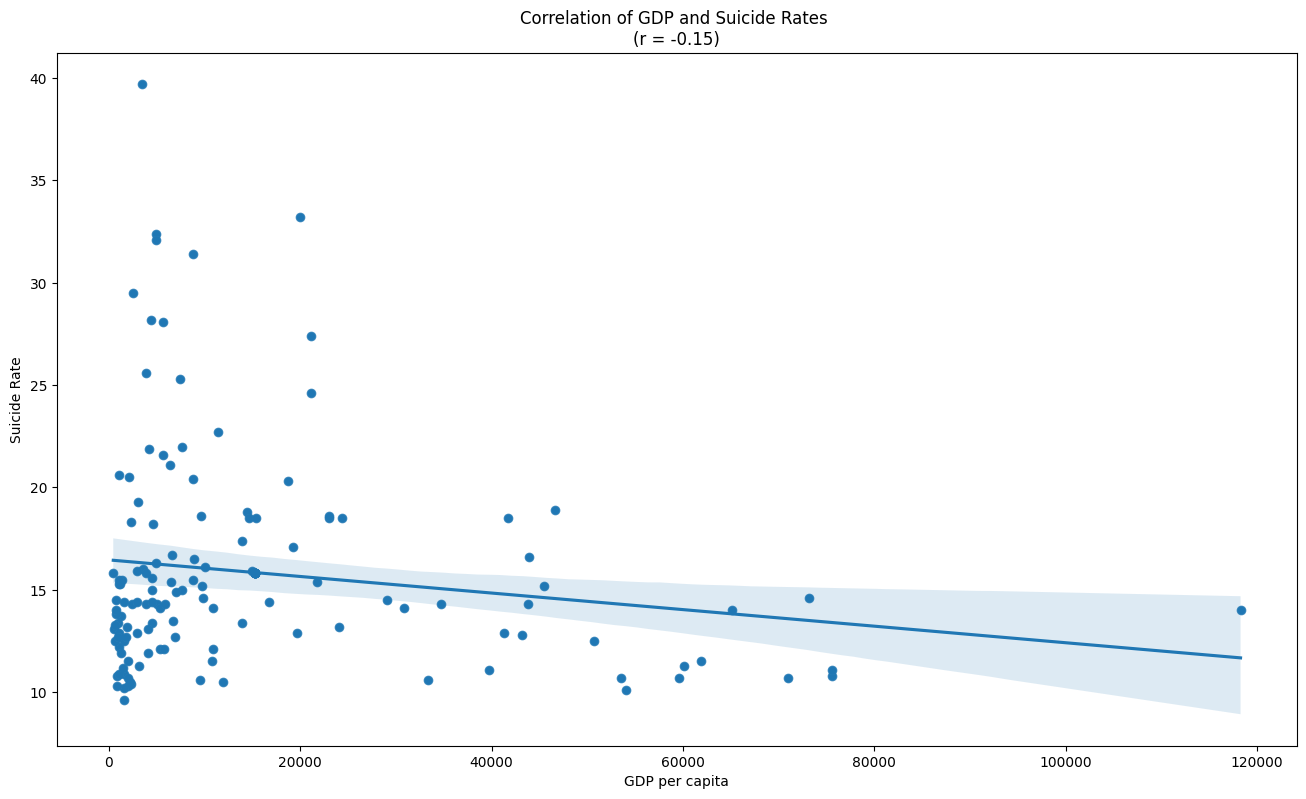

In [32]:
# Generate scatterplot for GDP and suicide rate, and Pearson correlation coefficient

suicide_rate_list = np.array(merged_df["Suicide Rate"].values.tolist())

plt.figure(figsize=(16,9))
suicide_gdp_rho = np.corrcoef(suicide_rate_list, gdp_list)
plt.title("Correlation of GDP and Suicide Rates \n(r = {:.2f})".format(suicide_gdp_rho[0,1]))
sns.scatterplot(data=merged_df, x="GDP per capita", y="Suicide Rate")
sns.regplot(data=merged_df, x="GDP per capita", y="Suicide Rate")

Based on the Pearson Correlation Coefficient, GDP per capita and suicide rate have a very weak, negative linear relationship. This shows that suicide rates are not heavily correlated with the economic status of the country. It is proof that suicide can happen in first-world or third-world countries and that the risk of suicide is probable to anyone without relation to their status.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141]),
 [Text(0, 0, 'Armenia'),
  Text(1, 0, 'Latvia'),
  Text(2, 0, 'Albania'),
  Text(3, 0, 'Mongolia'),
  Text(4, 0, 'Belarus'),
  Text(5, 0, 'Moldova'),
  Text(6, 0, 'Georgia'),
  Text(7, 0, 'Bosnia and 

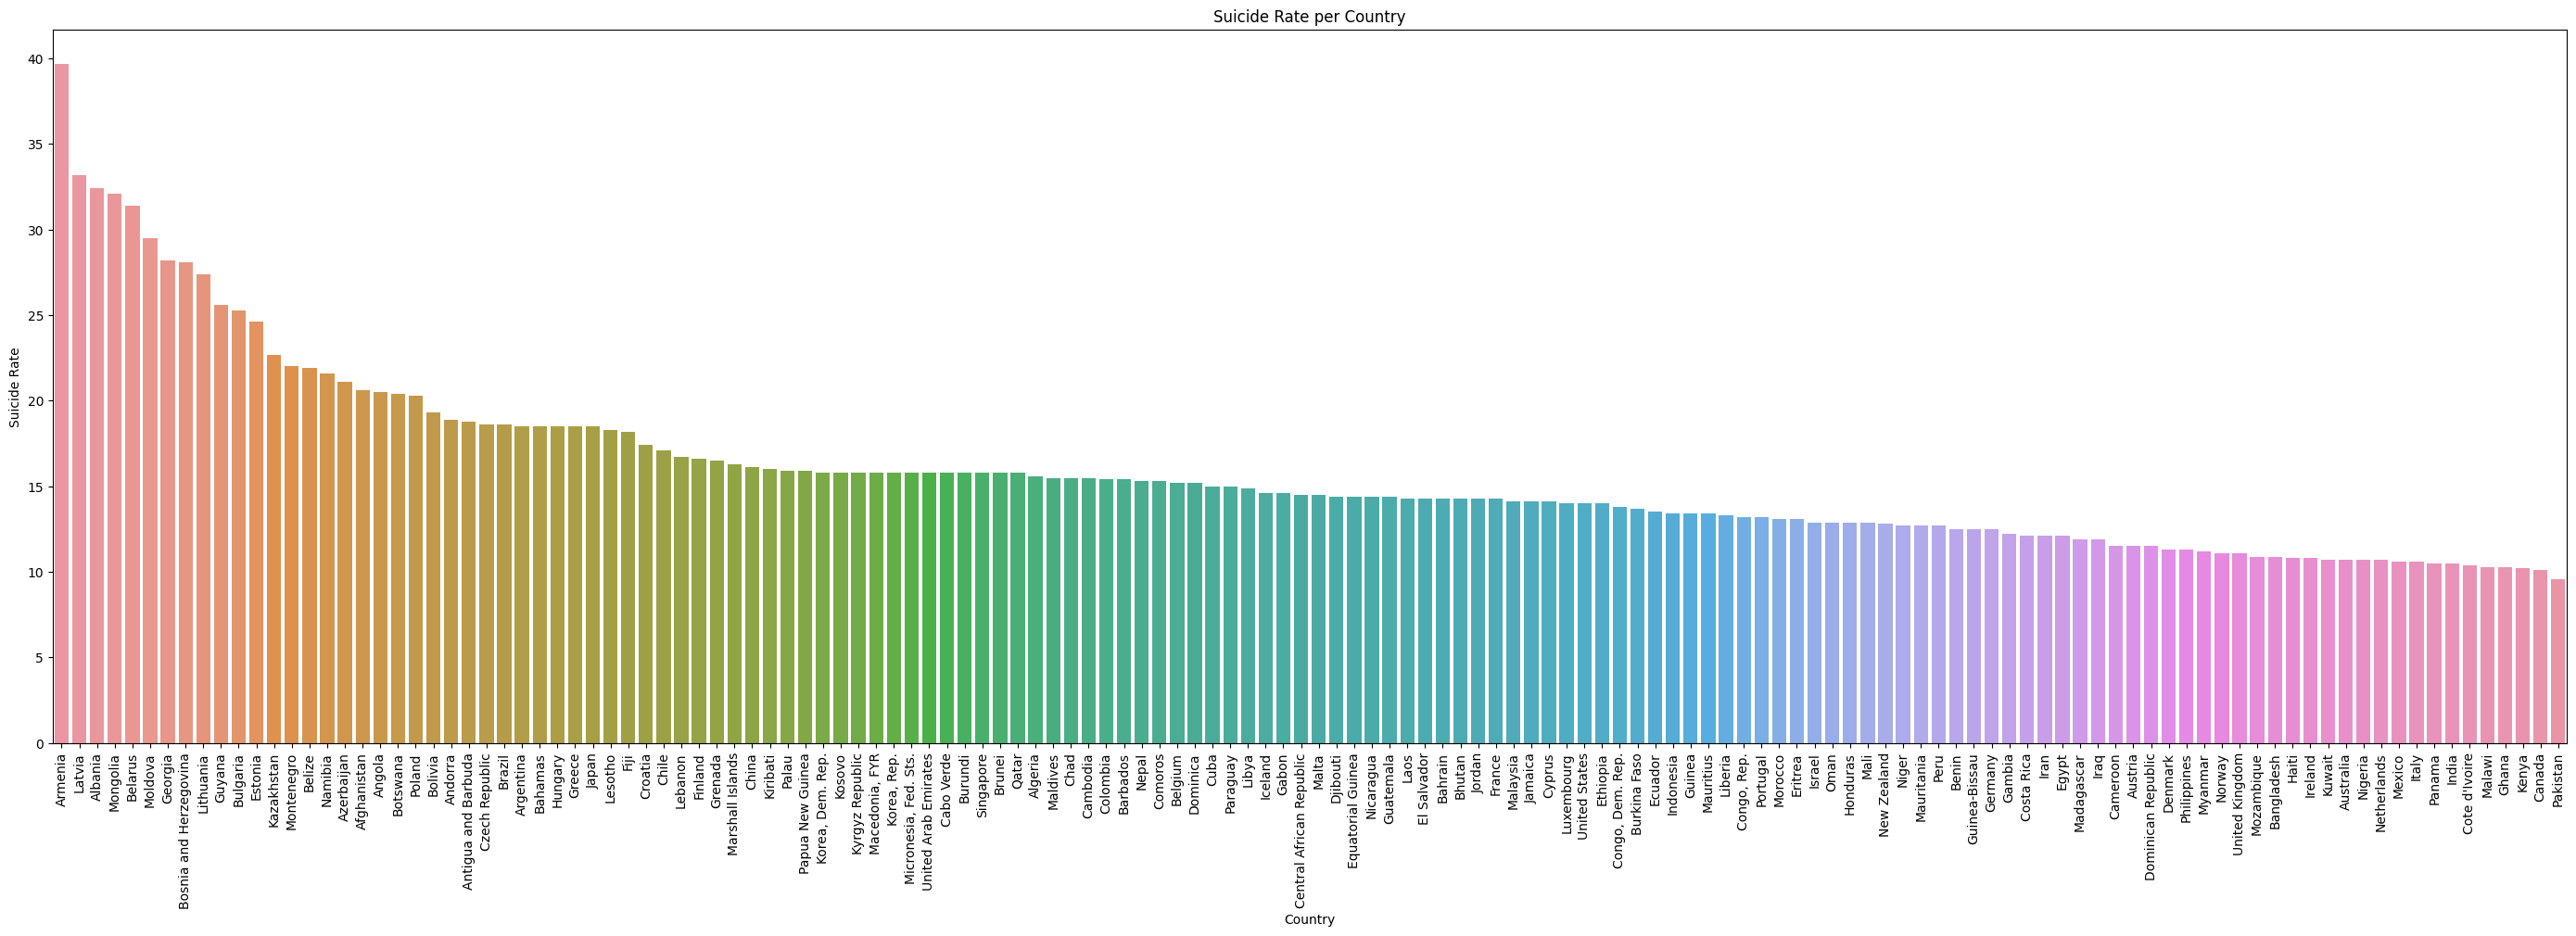

In [33]:
# Generate bar plot for all countries' suicide rates

plt.figure(figsize=(35,10))
plt.title("Suicide Rate per Country")
sorted_sr_data = merged_df.sort_values("Suicide Rate", ascending=False).reset_index(drop=True)
sns.barplot(data=sorted_sr_data, x="Country", y="Suicide Rate")
plt.xlabel("Country")
plt.xticks(rotation=90)

In [34]:
sorted_sr_data[["Country", "Suicide Rate"]].head()

,Country,Suicide Rate
0,Armenia,39.7
1,Latvia,33.2
2,Albania,32.4
3,Mongolia,32.1
4,Belarus,31.4


In [35]:
sorted_sr_data[["Country", "Suicide Rate"]].tail()

,Country,Suicide Rate
137,Malawi,10.3
138,Ghana,10.3
139,Kenya,10.2
140,Canada,10.1
141,Pakistan,9.6


The countries with the highest rates of suicide are Armenia at 39.7%, Latvia at 33.2%, Albania at 32.4%, Mongolia at 32.1%, and Belarus at 31.4%. The ones with the lowest rates are Malawi and Ghana at 10.3%, Kenya at 10.2%, Canada at 10.1, and Pakistan at 9.6%.

### 7. Does low happiness score indicate higher suicide rates?

<AxesSubplot: title={'center': 'Correlation of Happiness Score and Suicide Rates\n(r = 0.01)'}, xlabel='Happiness Score', ylabel='Suicide Rate'>

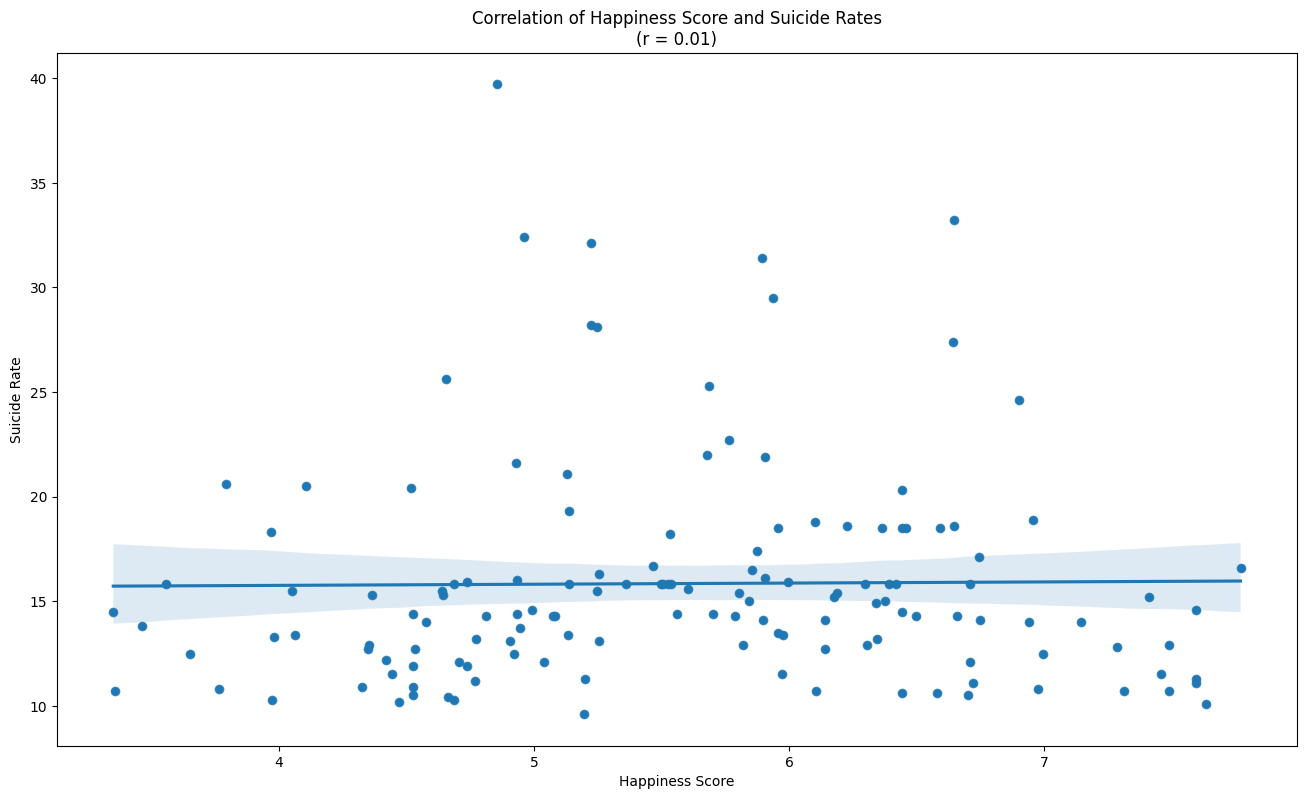

In [36]:
# Generate scatterplot for GDP and suicide rate, and Pearson correlation coefficient

happiness_score_list = np.array(merged_df["Happiness Score"].values.tolist())

plt.figure(figsize=(16,9))
suicide_happiness_rho = np.corrcoef(happiness_score_list, suicide_rate_list)
plt.title("Correlation of Happiness Score and Suicide Rates\n(r = {:.2f})".format(suicide_happiness_rho[0,1]))
sns.scatterplot(data=merged_df, x="Happiness Score", y="Suicide Rate")
sns.regplot(data=merged_df, x="Happiness Score", y="Suicide Rate")

Based on their Pearson correlation coefficient, happiness score is not a good indicator of a country's suicide rate since it has a very weak, positive, linear relationship. Since happiness is subjective, it might have caused anomalies in the data gathered which altered the resulting happiness score of the country. This causes a disparity and disagreement between the suicide rate and the overall happiness score of the area. This phenomenon can be exhibited by Armenia who has a moderate happiness score of 4.853 but has the highest suicide rate of 39.7%.

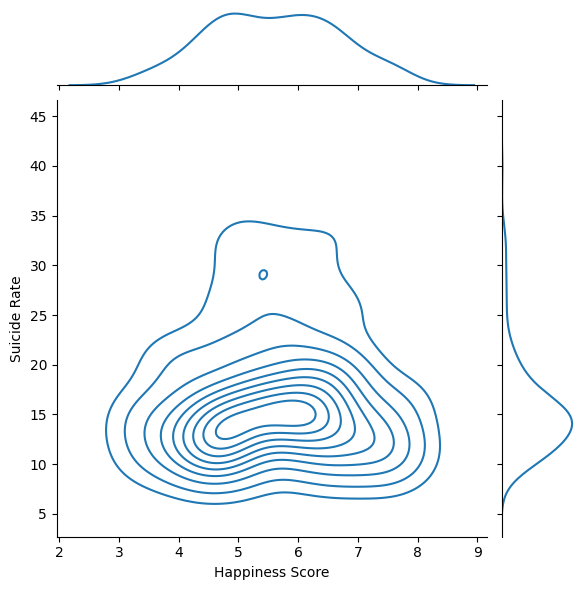

In [37]:
sns.jointplot(data=merged_df, x="Happiness Score", y="Suicide Rate", kind="kde")

The 2D KDE Plot shows that suicide rates are usually at around 12 - 15% with happiness score at around 4 - 7. 

# **Recommendations**
1. Find patterns between continents.
2. Add more countries to the dataset since it was only limited to the ones provided at 143.
3. Use machine learning to predict a country's future suicide rate and happiness score.